In [9]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 10)

import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
df_raw = pd.read_csv("../data/petfinder-adoption-prediction/train/train.csv")
df_raw.columns = df_raw.columns.str.lower() #make column names lowercase

In [7]:
df_description = df_raw.query('adoptionspeed == 0 or adoptionspeed == 1 ').description

In [8]:
df_description.head()

1     I just found it alone yesterday near my apartm...
6     anyone within the area of ipoh or taiping who ...
8     healthy and active, feisty kitten found in nei...
10    For serious adopter, please do sms or call for...
11    Kali is a super playful kitten who is on the g...
Name: description, dtype: object

In [19]:
#create list from the description column
text = df_description.tolist() 

# to lower case
text = str(text)
#already lower case


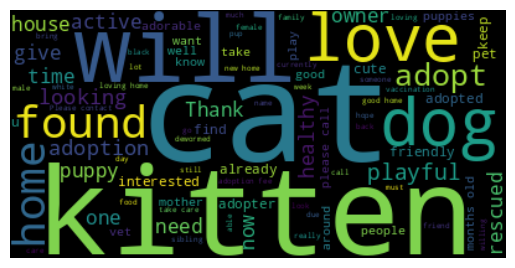

In [20]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [22]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('cat', 1061), ('kitten', 995), ('will', 927), ('love', 892), ('dog', 880)]
[('cat', 1.0), ('kitten', 0.937794533459001), ('will', 0.8737040527803959), ('love', 0.8407163053722903), ('dog', 0.8294062205466541)]
